Gene Expression Data Visualization and Analysis

Overview:
This notebook visualizes the distribution of the mean expression ratio of genes across all samples from single-cell RNA sequencing (scRNA-seq) data. 

The workflow involves:

1. Loading the previously computed gene statistics from a CSV file.
2. Plotting histograms of the mean gene expression ratio.
4. Visualizing the log-transformed distribution to check for normalization.

In [70]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import os

In [71]:
# Set the directory containing the aggregated data
data_dir = 'gene_statistics_across_samples'

# Load the mean expression data across samples
mean_df = pd.read_csv(os.path.join(data_dir, 'gene_means_across_samples.csv'), index_col=0)

In [72]:
# Quantile normalization function
def quantile_normalize(df):
    """
    Perform quantile normalization on the input DataFrame, where each column represents a sample
    and each row represents gene expression levels for a particular gene.
    
    Parameters:
    - df: DataFrame with samples as columns and genes as rows.

    Returns:
    - DataFrame with quantile normalized values.
    """
    sorted_df = np.sort(df.values, axis=0)
    rank_means = np.mean(sorted_df, axis=1)
    normalized_df = df.rank(method="min").stack().astype(int).map(dict(enumerate(rank_means, start=1)))
    normalized_df = normalized_df.unstack()
    normalized_df.index, normalized_df.columns = df.index, df.columns
    return normalized_df

In [73]:
# Apply quantile normalization to the gene expression data
mean_df_normalized = quantile_normalize(mean_df)

In [74]:
# Function to plot histograms for each gene across samples with different transformations
def plot_gene_distribution_across_samples(data, normalized_data, gene_name):
    """
    Plots histograms with different x-axes and transformations for a single gene across all samples, including original, 
    log-transformed, and quantile-normalized distributions.
    
    Parameters:
    - data: Series, the mean expression values of a gene across samples
    - normalized_data: Series, quantile-normalized mean expression values for the gene
    - gene_name: str, the name of the gene being plotted
    """
    # Original data (mean expression across samples)
    original = data.dropna()  # Drop any missing values in case of gene-sample mismatches
    
    # Define a small constant to replace zeros
    k = 1e-8

    # Replace zeros with the small constant before applying log transformation
    log2_transformed = np.log2(original.replace(0, k))
    normalized = normalized_data.replace(0, k)

    fig, axes = plt.subplots(3, 1, figsize=(12, 18))

    # Original data on linear scale
    sns.histplot(original, kde=True, ax=axes[0], bins=100)
    axes[0].set_title(f'Original Mean Expression Distribution Across Samples (Linear Scale) - {gene_name}')
    axes[0].set_xlabel('Mean Expression Ratio Across Samples')
    axes[0].set_ylabel('Count')

    # Log2-transformed data
    sns.histplot(log2_transformed, kde=True, ax=axes[1], bins=100)
    axes[1].set_title(f'Log2-Transformed Mean Expression Distribution Across Samples - {gene_name}')
    axes[1].set_xlabel('Log2(Mean Expression Ratio Across Samples)')
    axes[1].set_ylabel('Count')

    # Quantile-normalized data
    sns.histplot(normalized, kde=True, ax=axes[2], bins=100)
    axes[2].set_title(f'Quantile-Normalized Mean Expression Distribution Across Samples - {gene_name}')
    axes[2].set_xlabel('Quantile Normalized Mean Expression Ratio Across Samples')
    axes[2].set_ylabel('Count')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("Original data summary:")
    print(original.describe())
    print("\nLog2-transformed data summary:")
    print(log2_transformed.describe())
    print("\nQuantile-normalized data summary:")
    print(normalized.describe())



Analyzing gene: AL096701.1


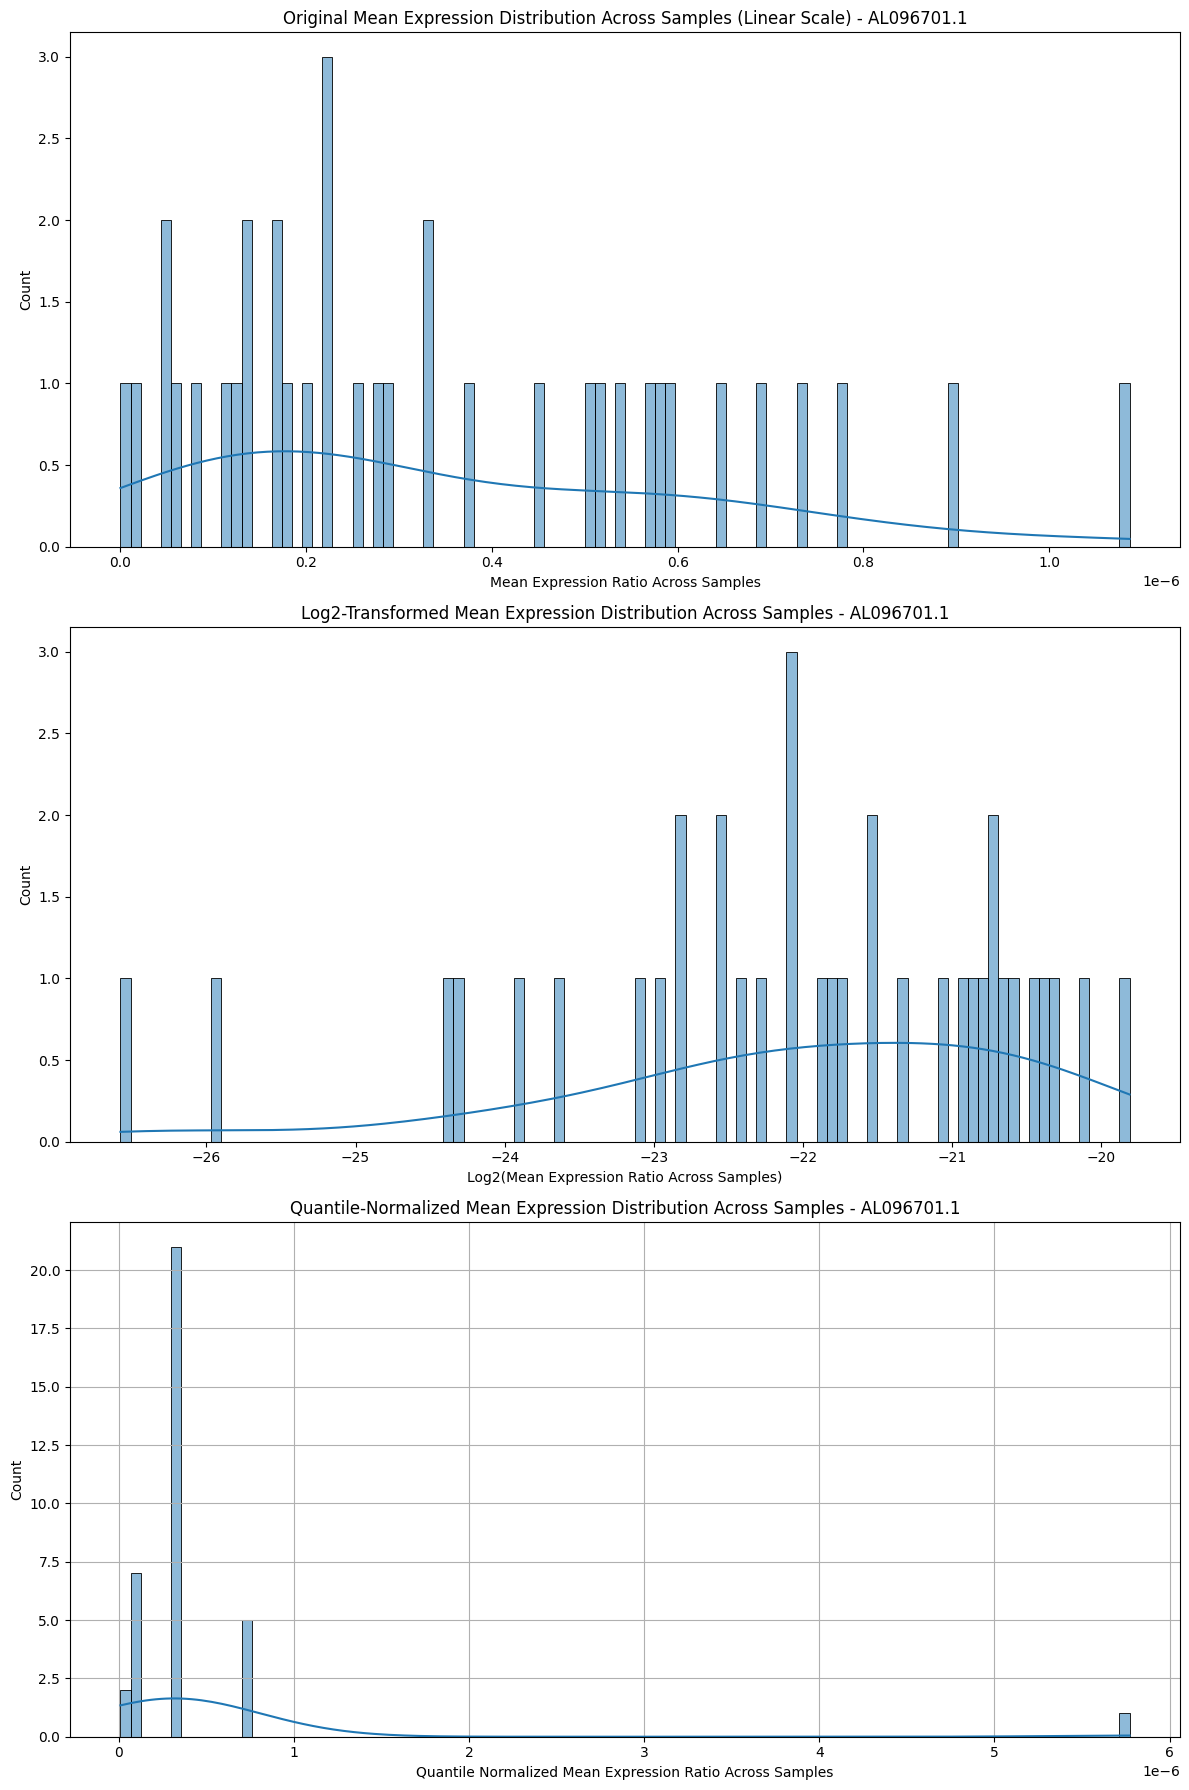

Original data summary:
count    3.600000e+01
mean     3.498181e-07
std      2.723844e-07
min      0.000000e+00
25%      1.359786e-07
50%      2.678641e-07
75%      5.500127e-07
max      1.086508e-06
Name: AL096701.1, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -22.045076
std       1.575066
min     -26.575425
25%     -22.810136
50%     -21.832770
75%     -20.794446
max     -19.811869
Name: AL096701.1, dtype: float64

Quantile-normalized data summary:
count    3.600000e+01
mean     4.801517e-07
std      9.268168e-07
min      1.000000e-08
25%      2.819277e-07
50%      3.349551e-07
75%      3.349551e-07
max      5.771816e-06
Name: AL096701.1, dtype: float64


Analyzing gene: SMN2


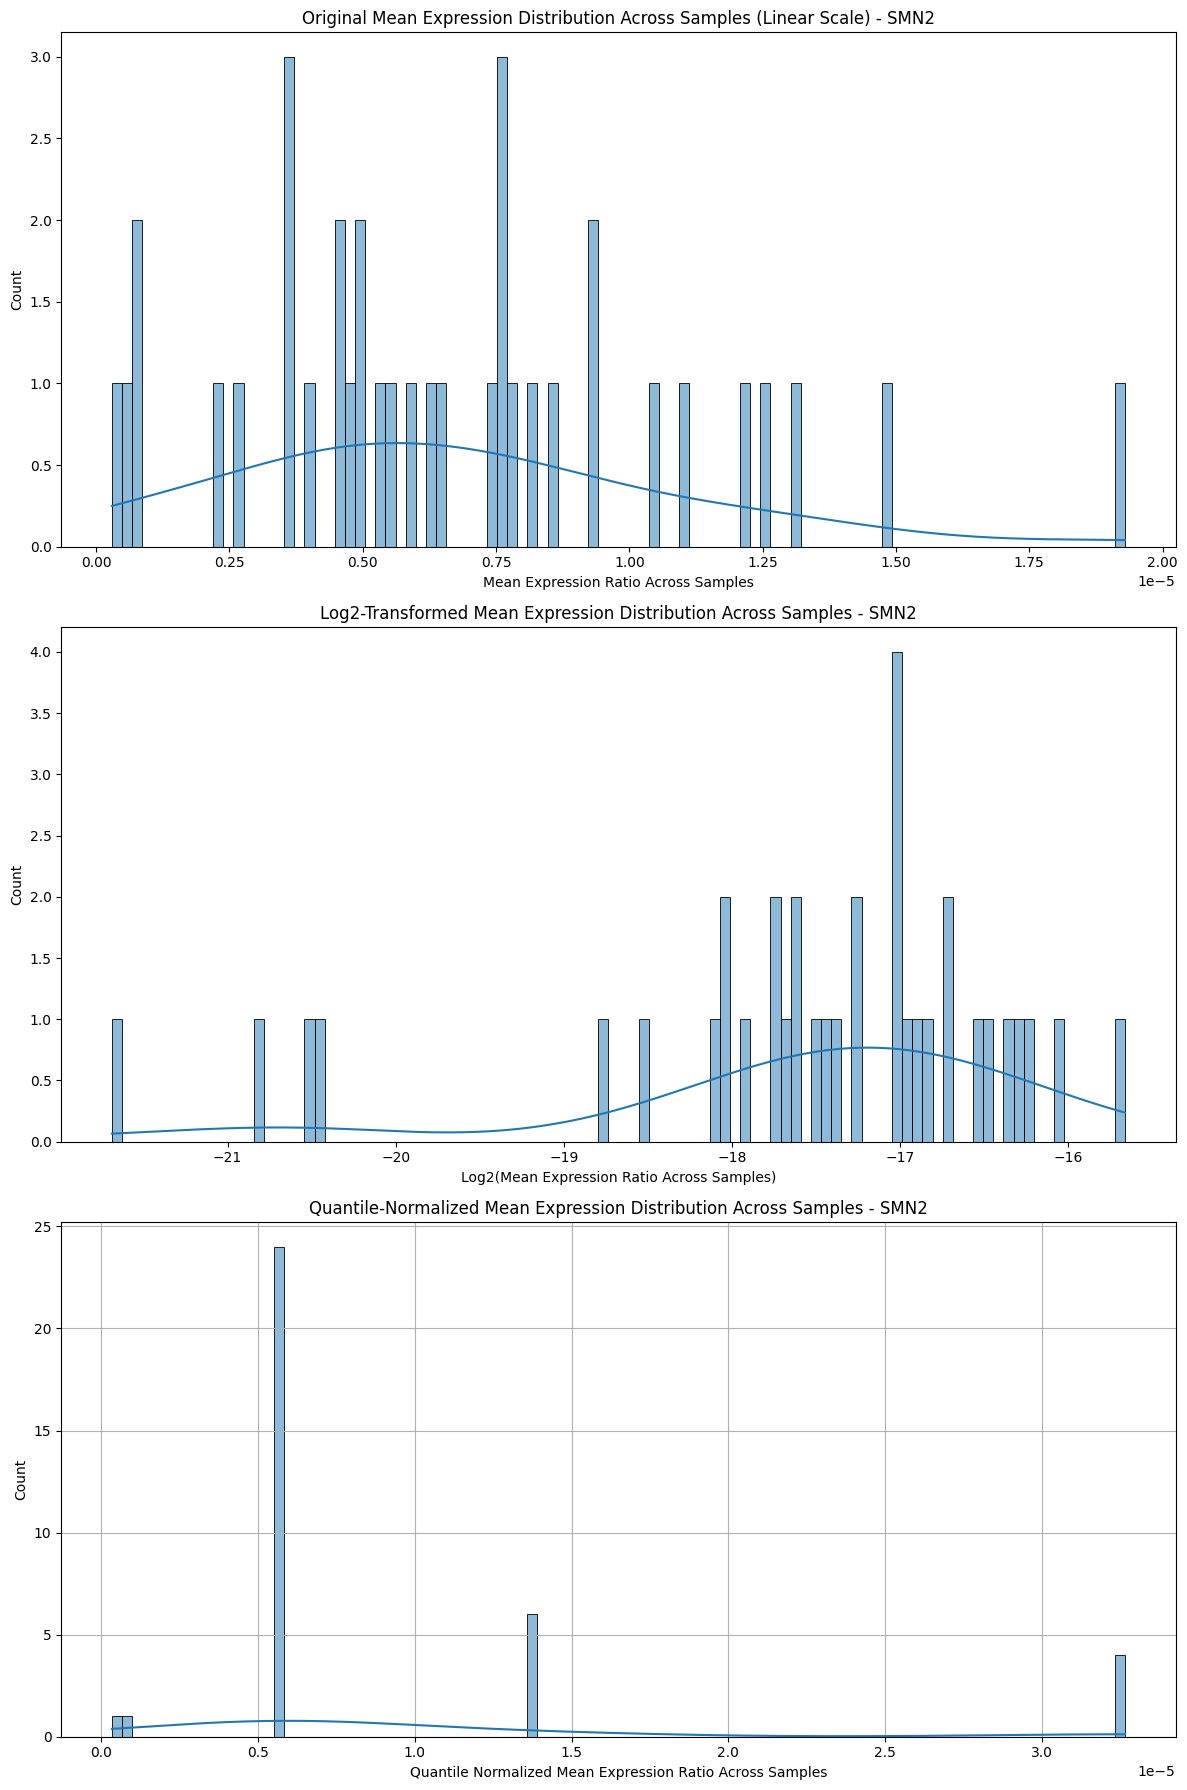

Original data summary:
count    3.600000e+01
mean     6.721722e-06
std      4.247852e-06
min      2.960059e-07
25%      3.914414e-06
50%      6.098503e-06
75%      8.791434e-06
max      1.929599e-05
Name: SMN2, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -17.610166
std       1.367259
min     -21.687871
25%     -17.963648
50%     -17.323596
75%     -16.796087
max     -15.661340
Name: SMN2, dtype: float64

Quantile-normalized data summary:
count    3.600000e+01
mean     9.780252e-06
std      8.846960e-06
min      3.349551e-07
25%      5.771816e-06
50%      5.771816e-06
75%      1.364992e-05
max      3.265287e-05
Name: SMN2, dtype: float64


Analyzing gene: PUF60


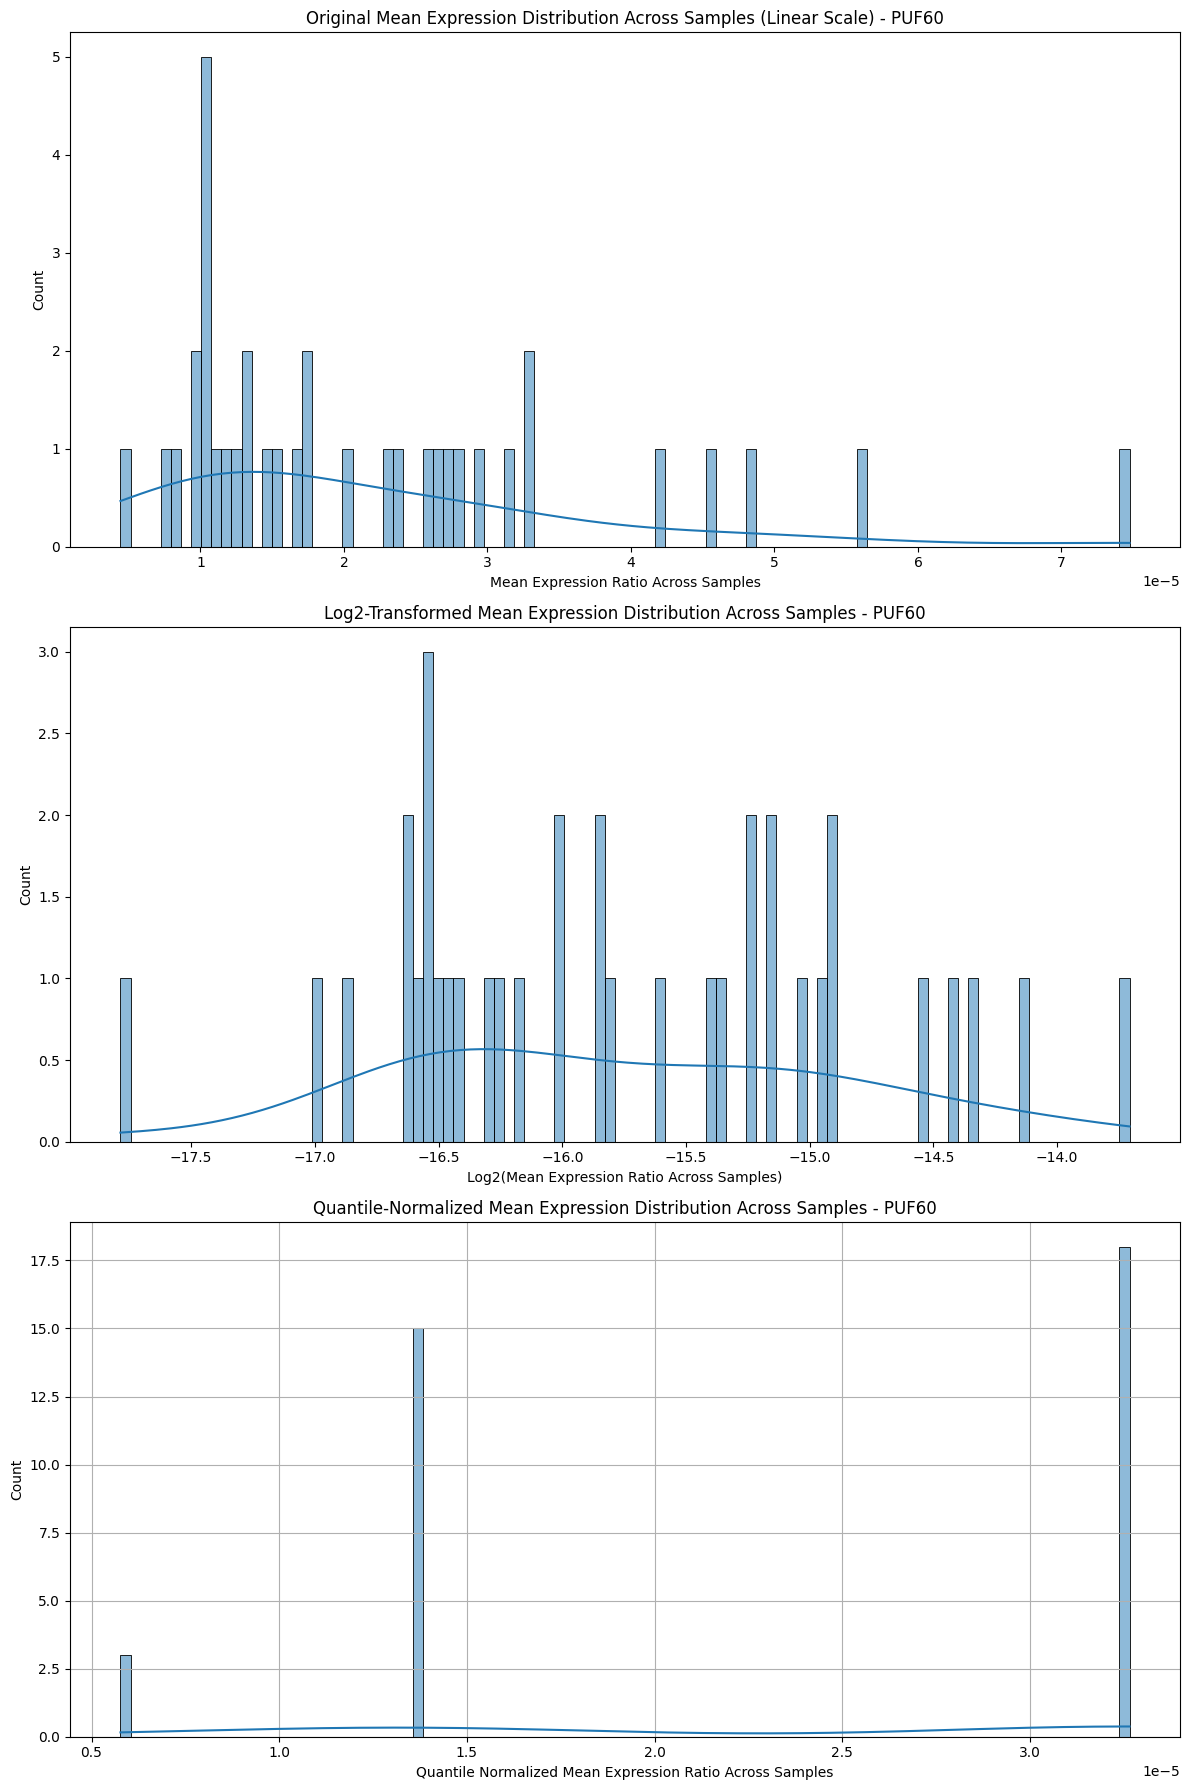

Original data summary:
count    36.000000
mean      0.000022
std       0.000015
min       0.000004
25%       0.000011
50%       0.000017
75%       0.000028
max       0.000075
Name: PUF60, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -15.742015
std       0.918942
min     -17.785490
25%     -16.512834
50%     -15.835793
75%     -15.115929
max     -13.707694
Name: PUF60, dtype: float64

Quantile-normalized data summary:
count    36.000000
mean      0.000022
std       0.000011
min       0.000006
25%       0.000014
50%       0.000023
75%       0.000033
max       0.000033
Name: PUF60, dtype: float64


Analyzing gene: OR5A1


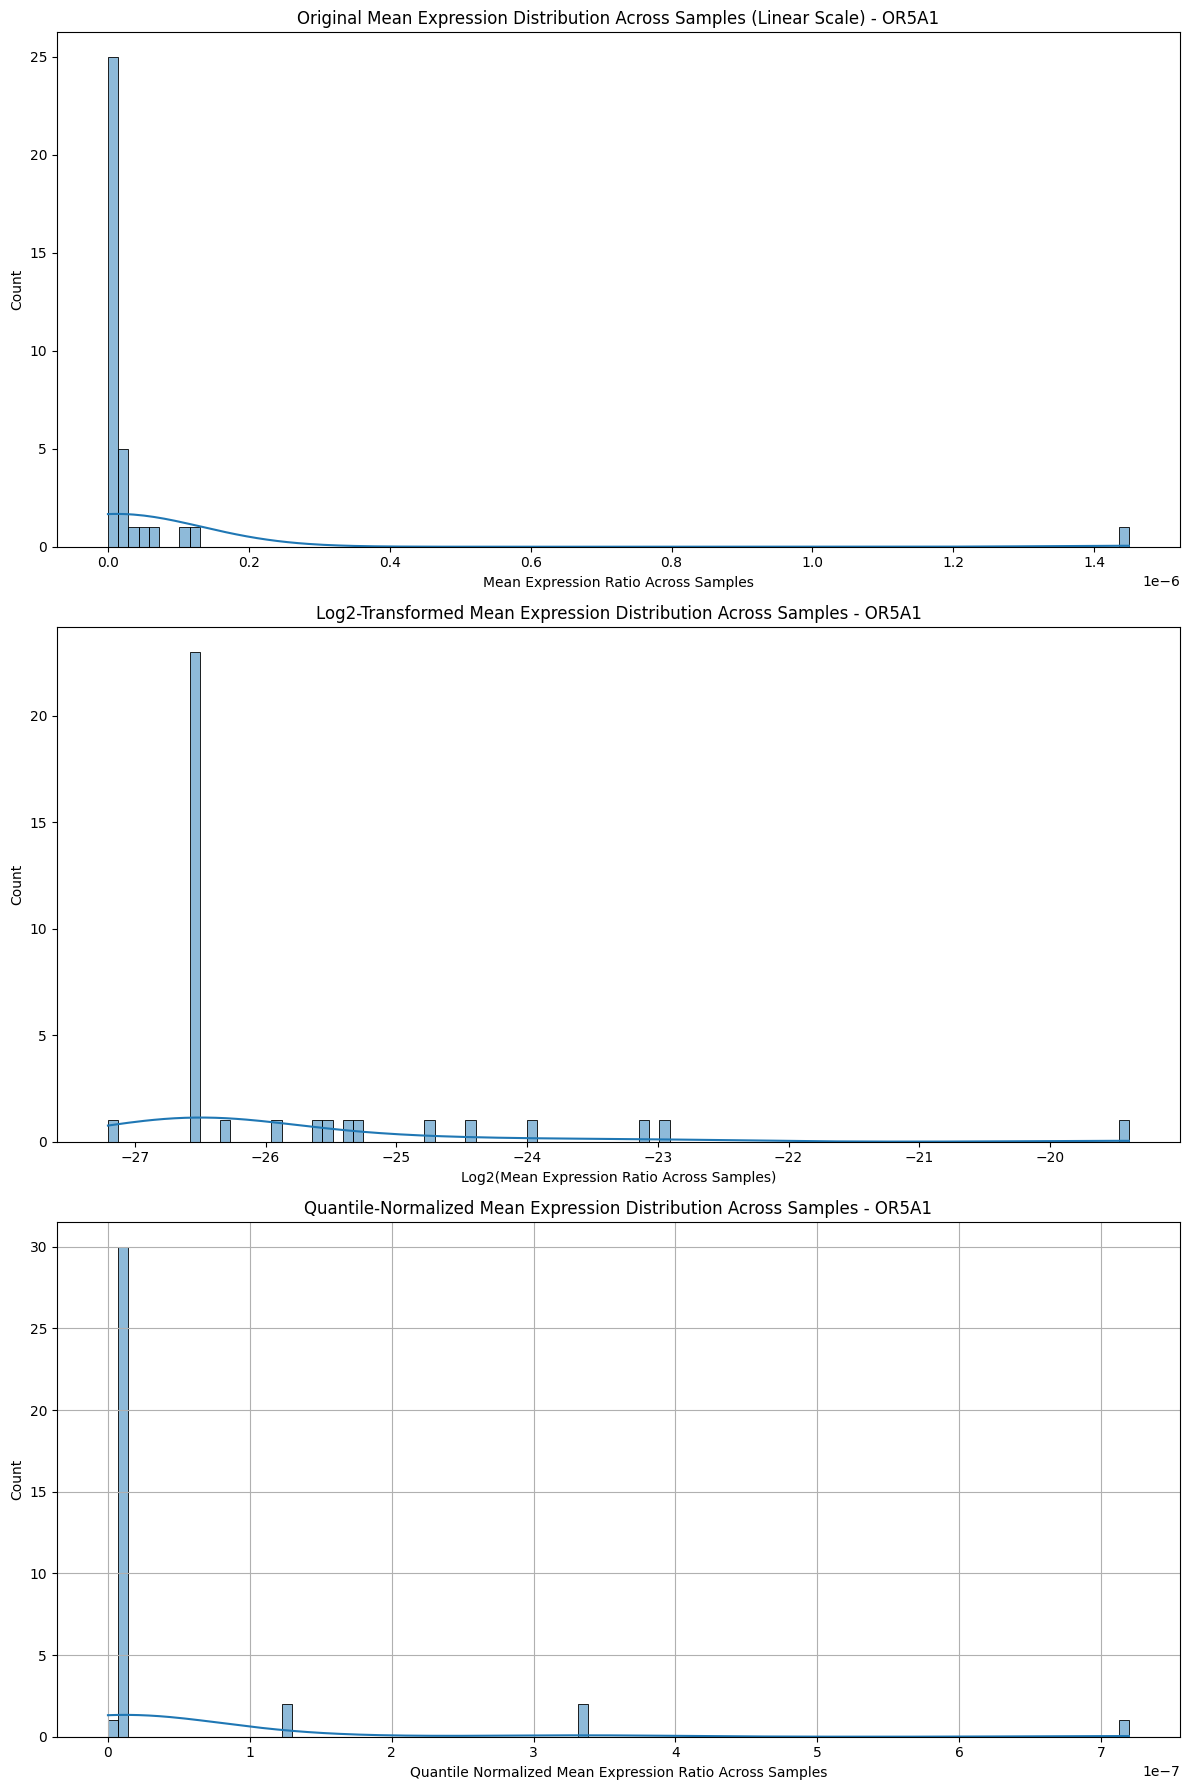

Original data summary:
count    3.600000e+01
mean     5.403064e-08
std      2.409463e-07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.978055e-08
max      1.449221e-06
Name: OR5A1, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -25.864575
std       1.504248
min     -27.205479
25%     -26.575425
50%     -26.575425
75%     -25.591669
max     -19.396291
Name: OR5A1, dtype: float64

Quantile-normalized data summary:
count    3.600000e+01
mean     5.417560e-08
std      1.383506e-07
min      1.794867e-10
25%      1.000000e-08
50%      1.000000e-08
75%      1.214809e-08
max      7.195038e-07
Name: OR5A1, dtype: float64


Analyzing gene: AL121748.1


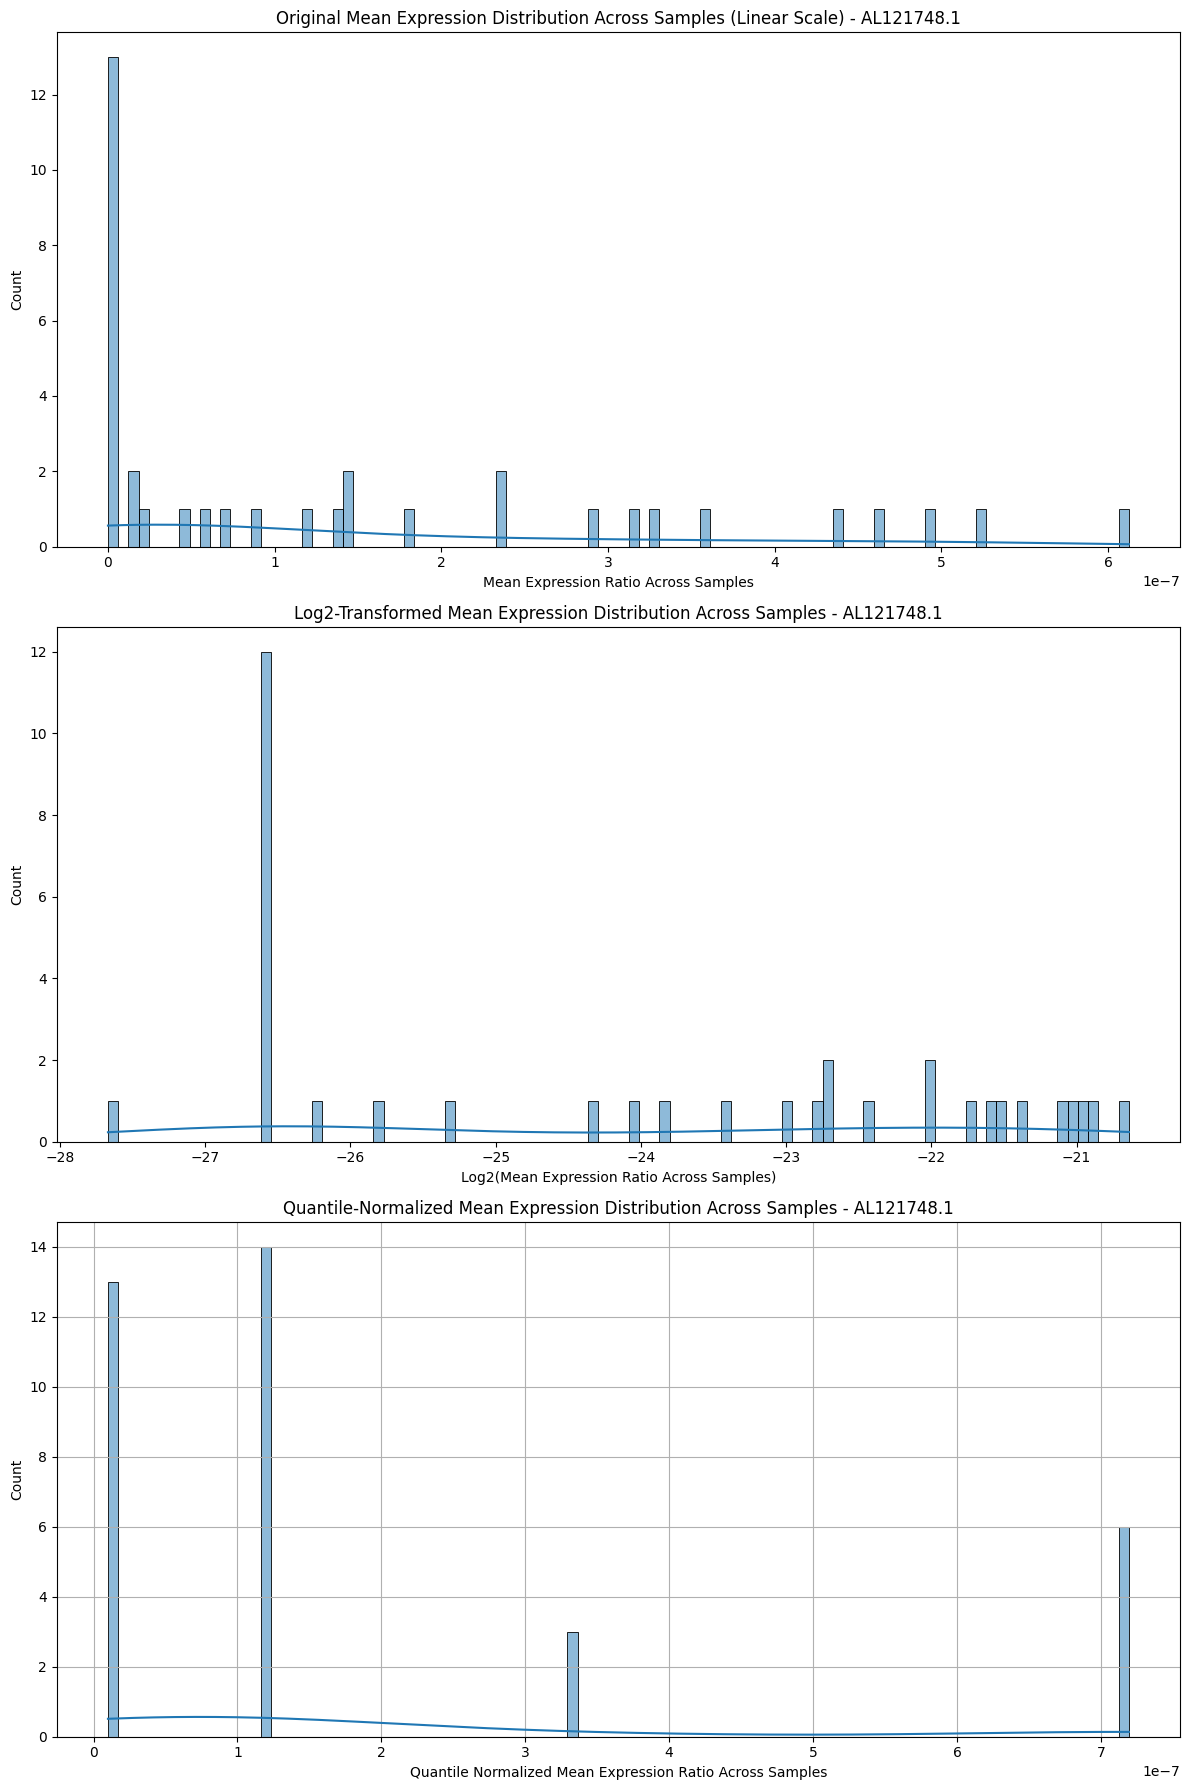

Original data summary:
count    3.600000e+01
mean     1.481868e-07
std      1.823033e-07
min      0.000000e+00
25%      0.000000e+00
50%      6.301410e-08
75%      2.516220e-07
max      6.124715e-07
Name: AL121748.1, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -24.114697
std       2.330975
min     -27.669412
25%     -26.575425
50%     -23.923931
75%     -21.928221
max     -20.638854
Name: AL121748.1, dtype: float64

Quantile-normalized data summary:
count    3.600000e+01
mean     1.992743e-07
std      2.521764e-07
min      1.000000e-08
25%      1.000000e-08
50%      1.228457e-07
75%      1.758730e-07
max      7.195038e-07
Name: AL121748.1, dtype: float64


Analyzing gene: HNRNPFP1


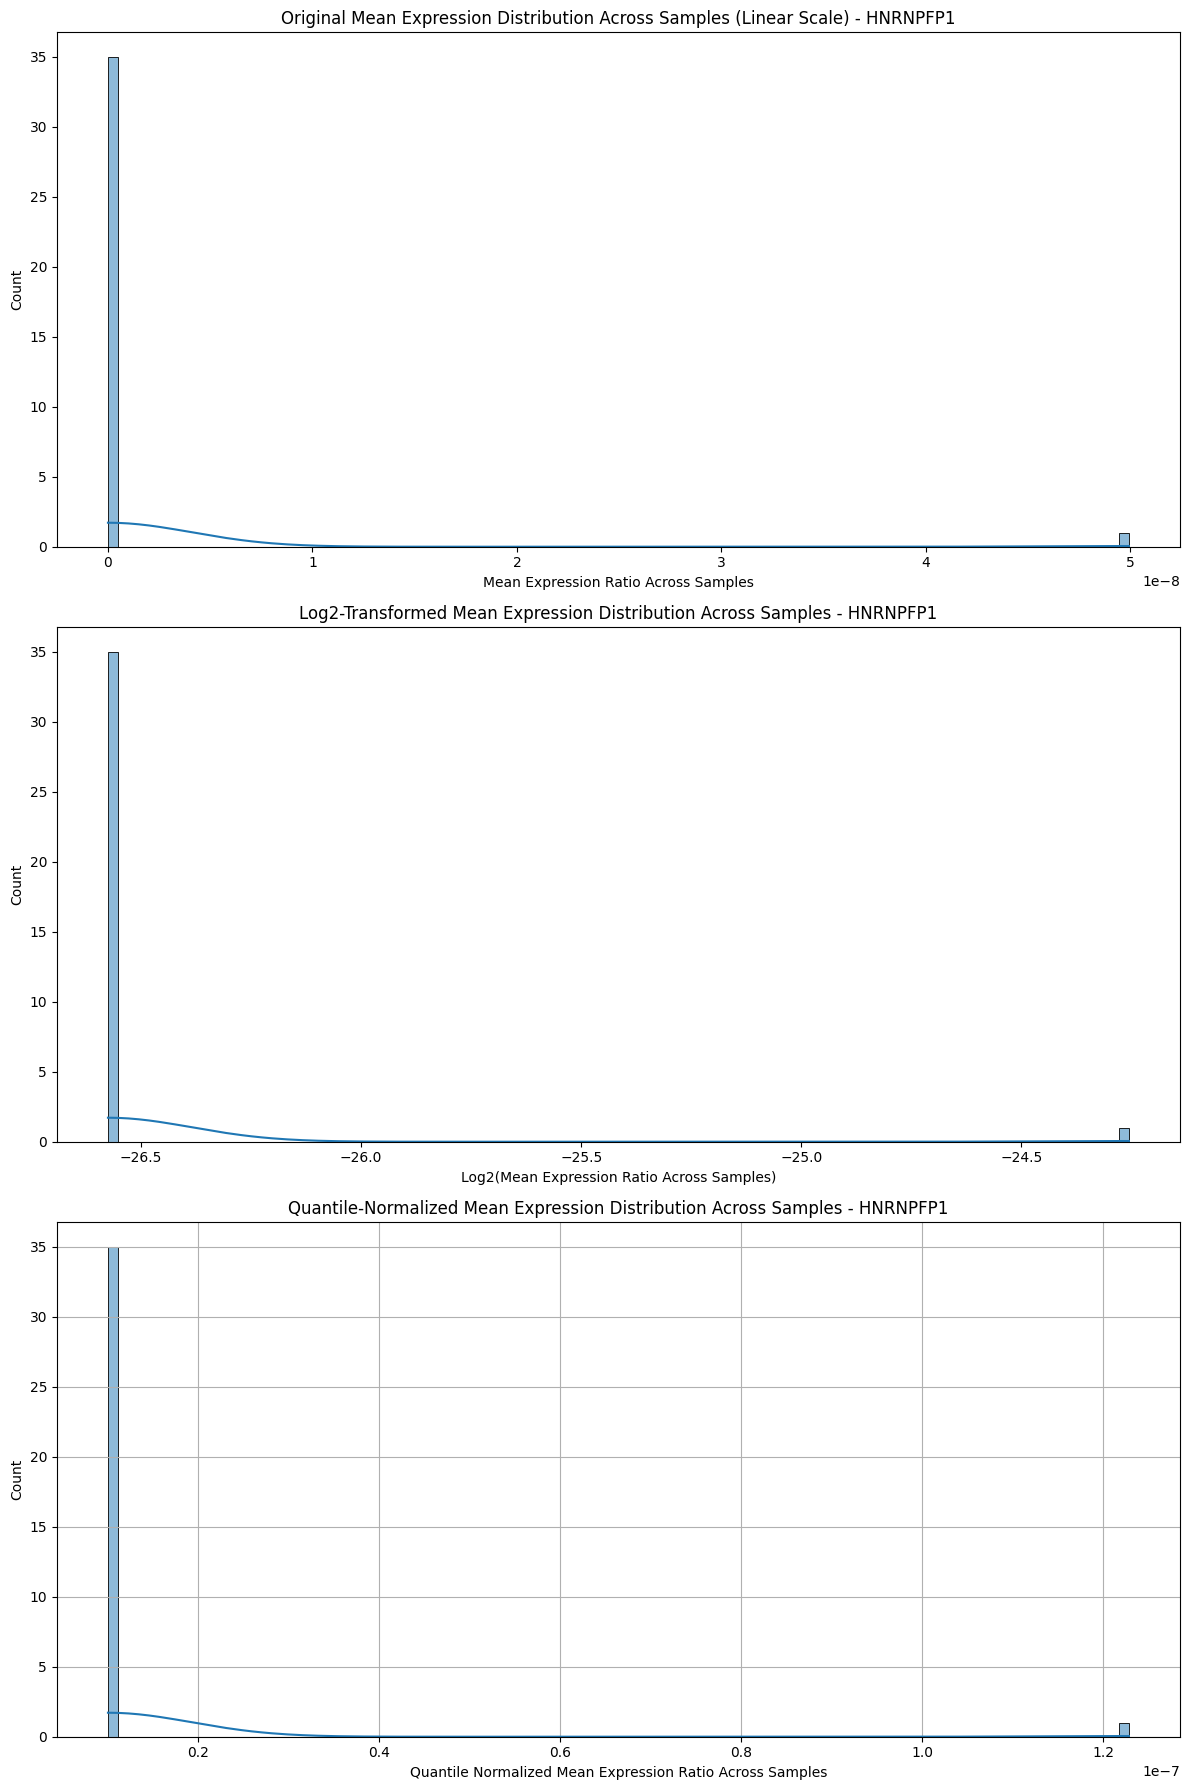

Original data summary:
count    3.600000e+01
mean     1.387088e-09
std      8.322531e-09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.993518e-08
Name: HNRNPFP1, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -26.510979
std       0.386676
min     -26.575425
25%     -26.575425
50%     -26.575425
75%     -26.575425
max     -24.255368
Name: HNRNPFP1, dtype: float64

Quantile-normalized data summary:
count    3.600000e+01
mean     1.313460e-08
std      1.880761e-08
min      1.000000e-08
25%      1.000000e-08
50%      1.000000e-08
75%      1.000000e-08
max      1.228457e-07
Name: HNRNPFP1, dtype: float64


Analyzing gene: LINC01036


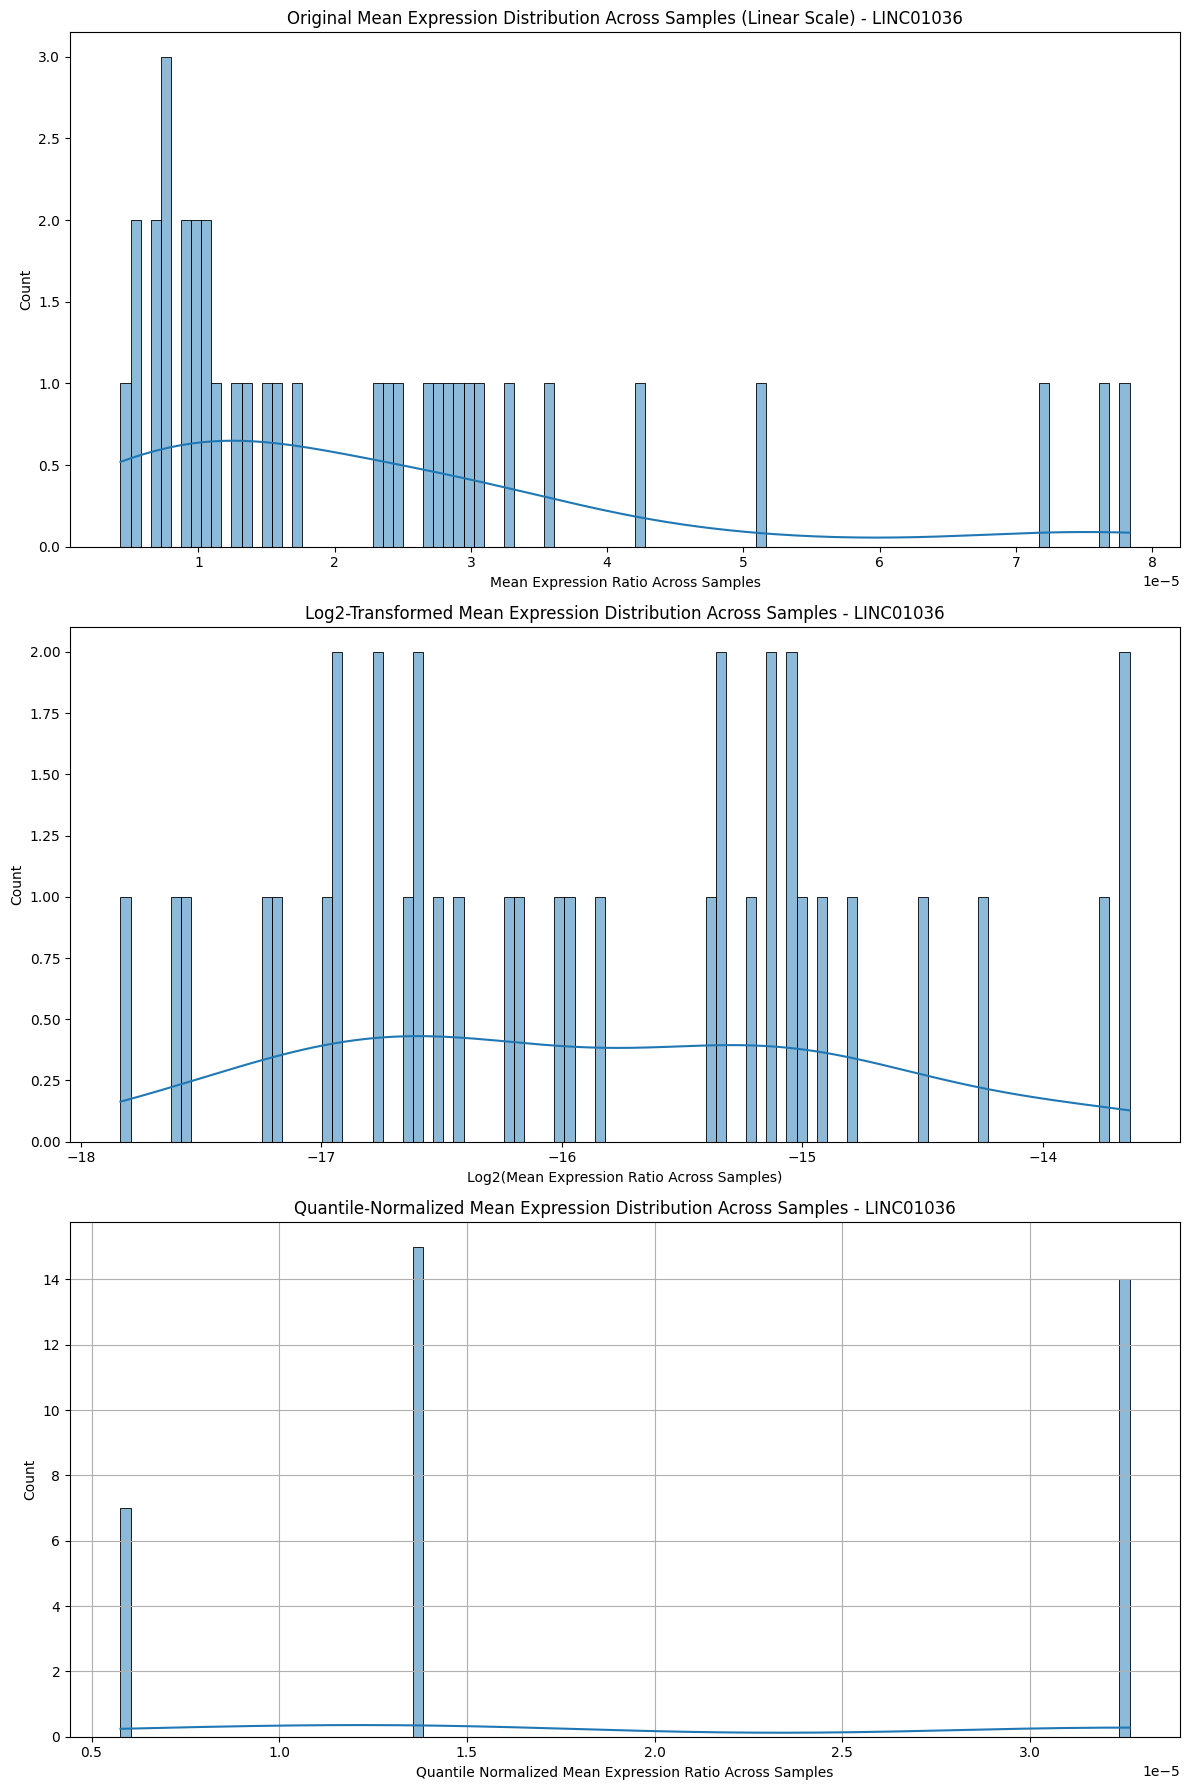

Original data summary:
count    36.000000
mean      0.000023
std       0.000020
min       0.000004
25%       0.000009
50%       0.000015
75%       0.000029
max       0.000078
Name: LINC01036, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -15.857982
std       1.150605
min     -17.835157
25%     -16.764243
50%     -15.996569
75%     -15.049136
max     -13.639791
Name: LINC01036, dtype: float64

Quantile-normalized data summary:
count    36.000000
mean      0.000020
std       0.000011
min       0.000006
25%       0.000014
50%       0.000014
75%       0.000033
max       0.000033
Name: LINC01036, dtype: float64


Analyzing gene: AF111169.3


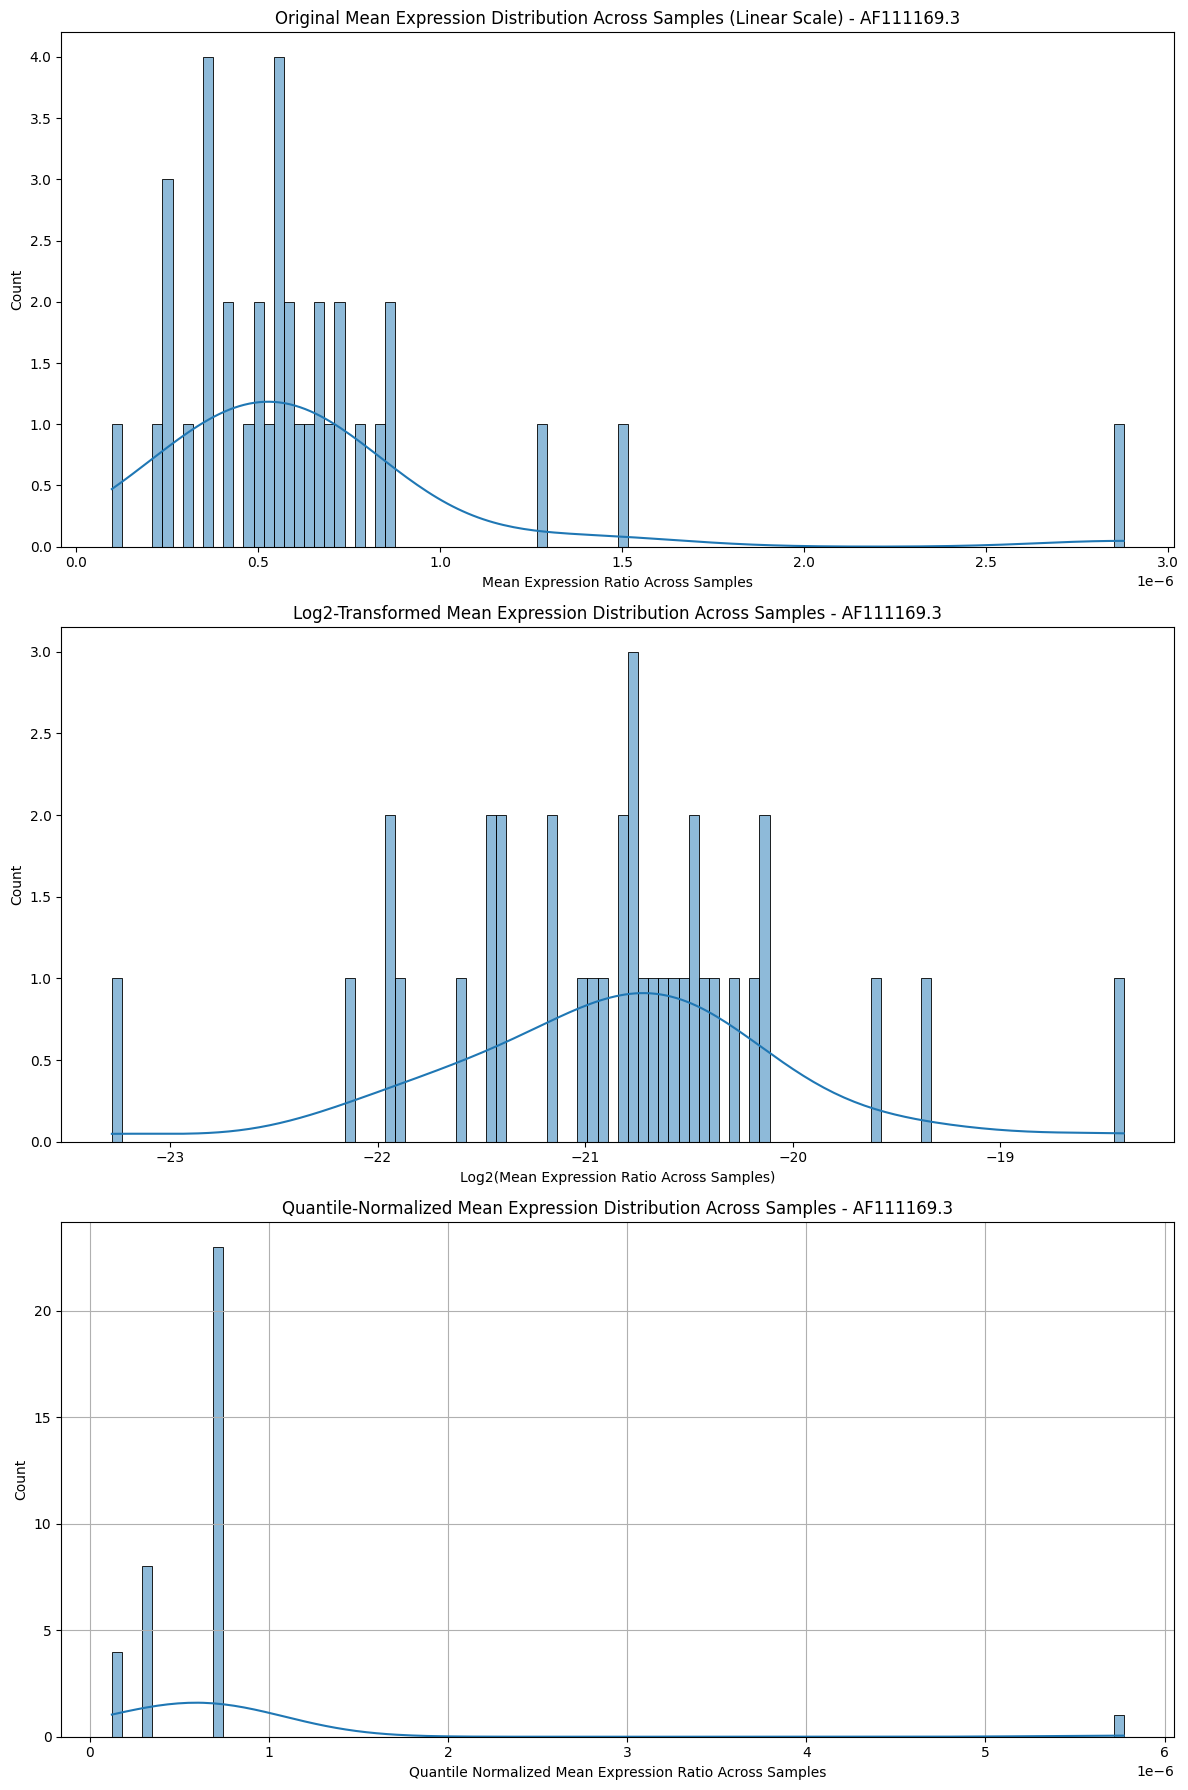

Original data summary:
count    3.600000e+01
mean     6.340084e-07
std      4.750183e-07
min      9.819756e-08
25%      3.657267e-07
50%      5.600316e-07
75%      6.921690e-07
max      2.878231e-06
Name: AF111169.3, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -20.848545
std       0.857066
min     -23.279738
25%     -21.382736
50%     -20.768036
75%     -20.462702
max     -18.406386
Name: AF111169.3, dtype: float64

Quantile-normalized data summary:
count    3.600000e+01
mean     7.080952e-07
std      8.964724e-07
min      1.228457e-07
25%      3.349551e-07
50%      7.195038e-07
75%      7.195038e-07
max      5.771816e-06
Name: AF111169.3, dtype: float64


Analyzing gene: KNOP1P1


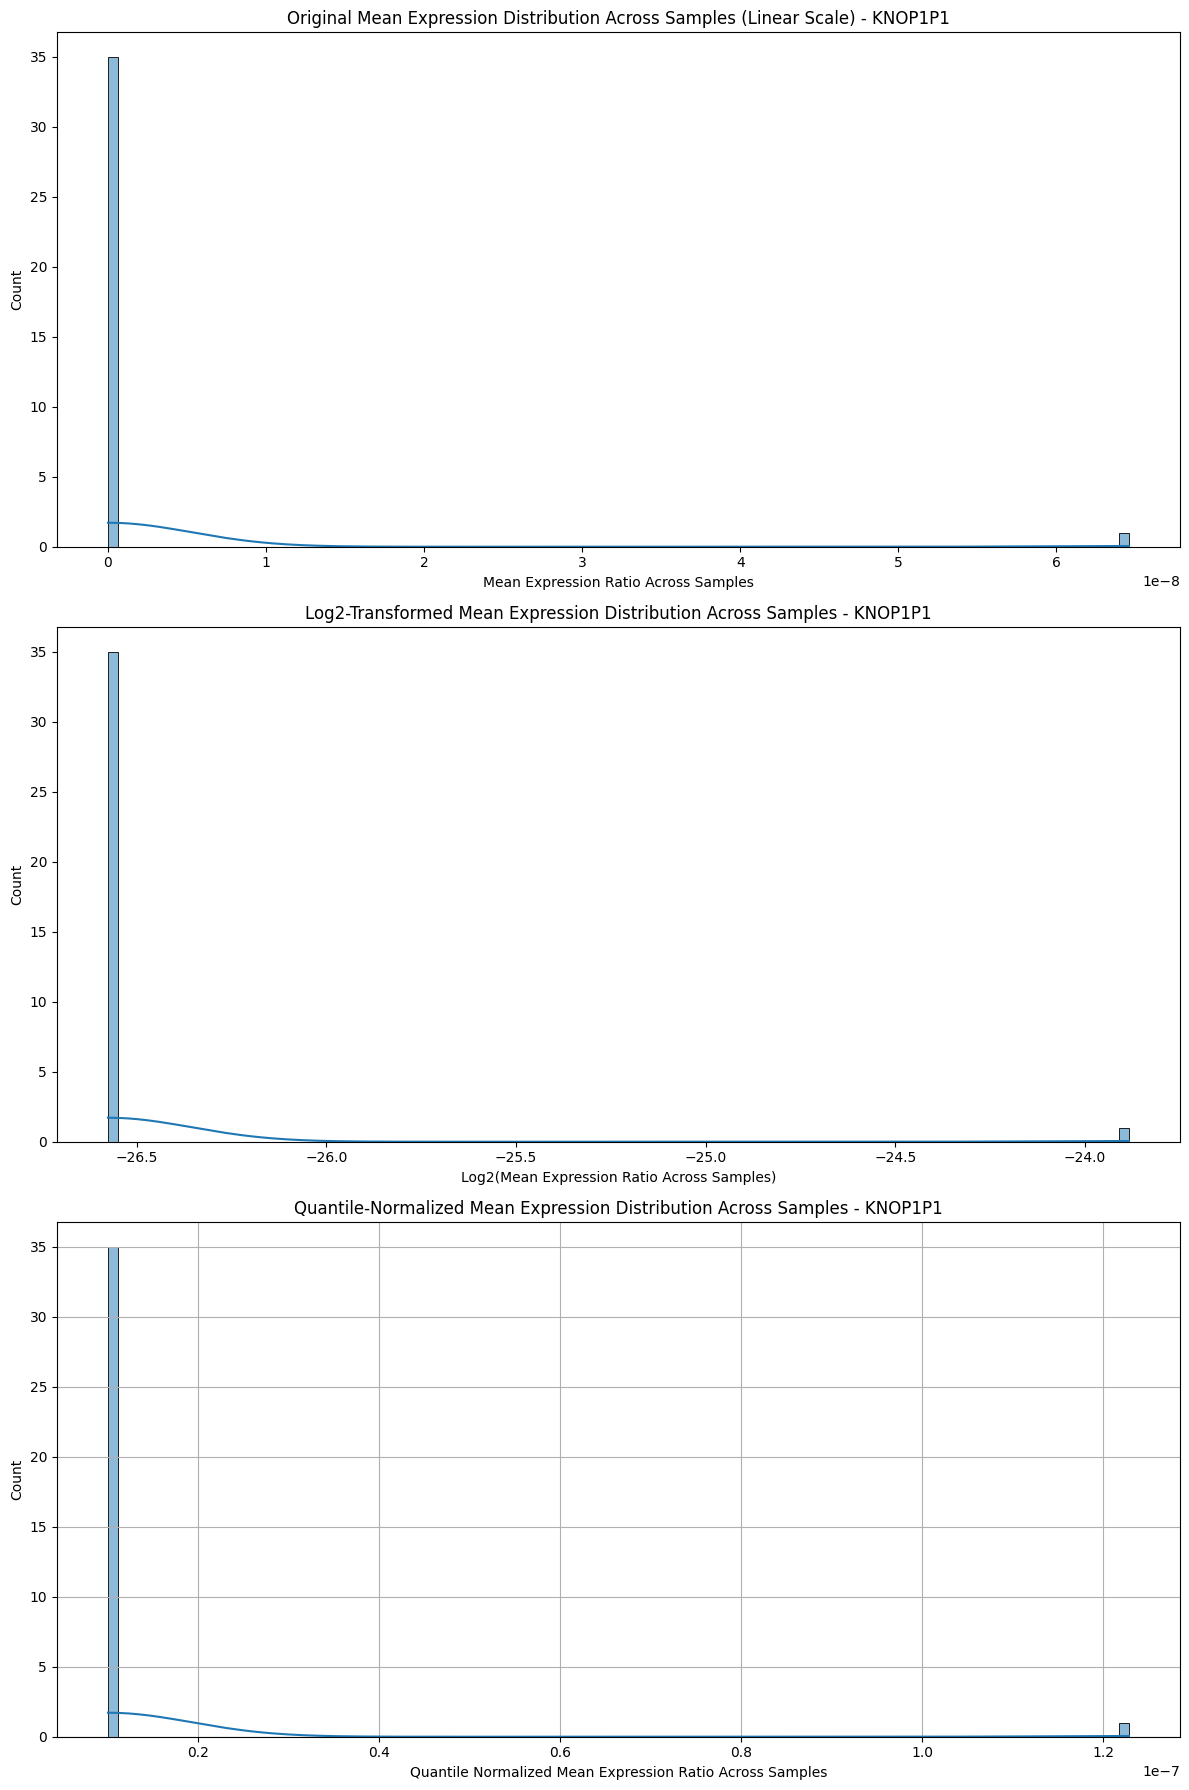

Original data summary:
count    3.600000e+01
mean     1.794291e-09
std      1.076575e-08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.459448e-08
Name: KNOP1P1, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -26.500663
std       0.448568
min     -26.575425
25%     -26.575425
50%     -26.575425
75%     -26.575425
max     -23.884014
Name: KNOP1P1, dtype: float64

Quantile-normalized data summary:
count    3.600000e+01
mean     1.313460e-08
std      1.880761e-08
min      1.000000e-08
25%      1.000000e-08
50%      1.000000e-08
75%      1.000000e-08
max      1.228457e-07
Name: KNOP1P1, dtype: float64


Analyzing gene: AC011396.1


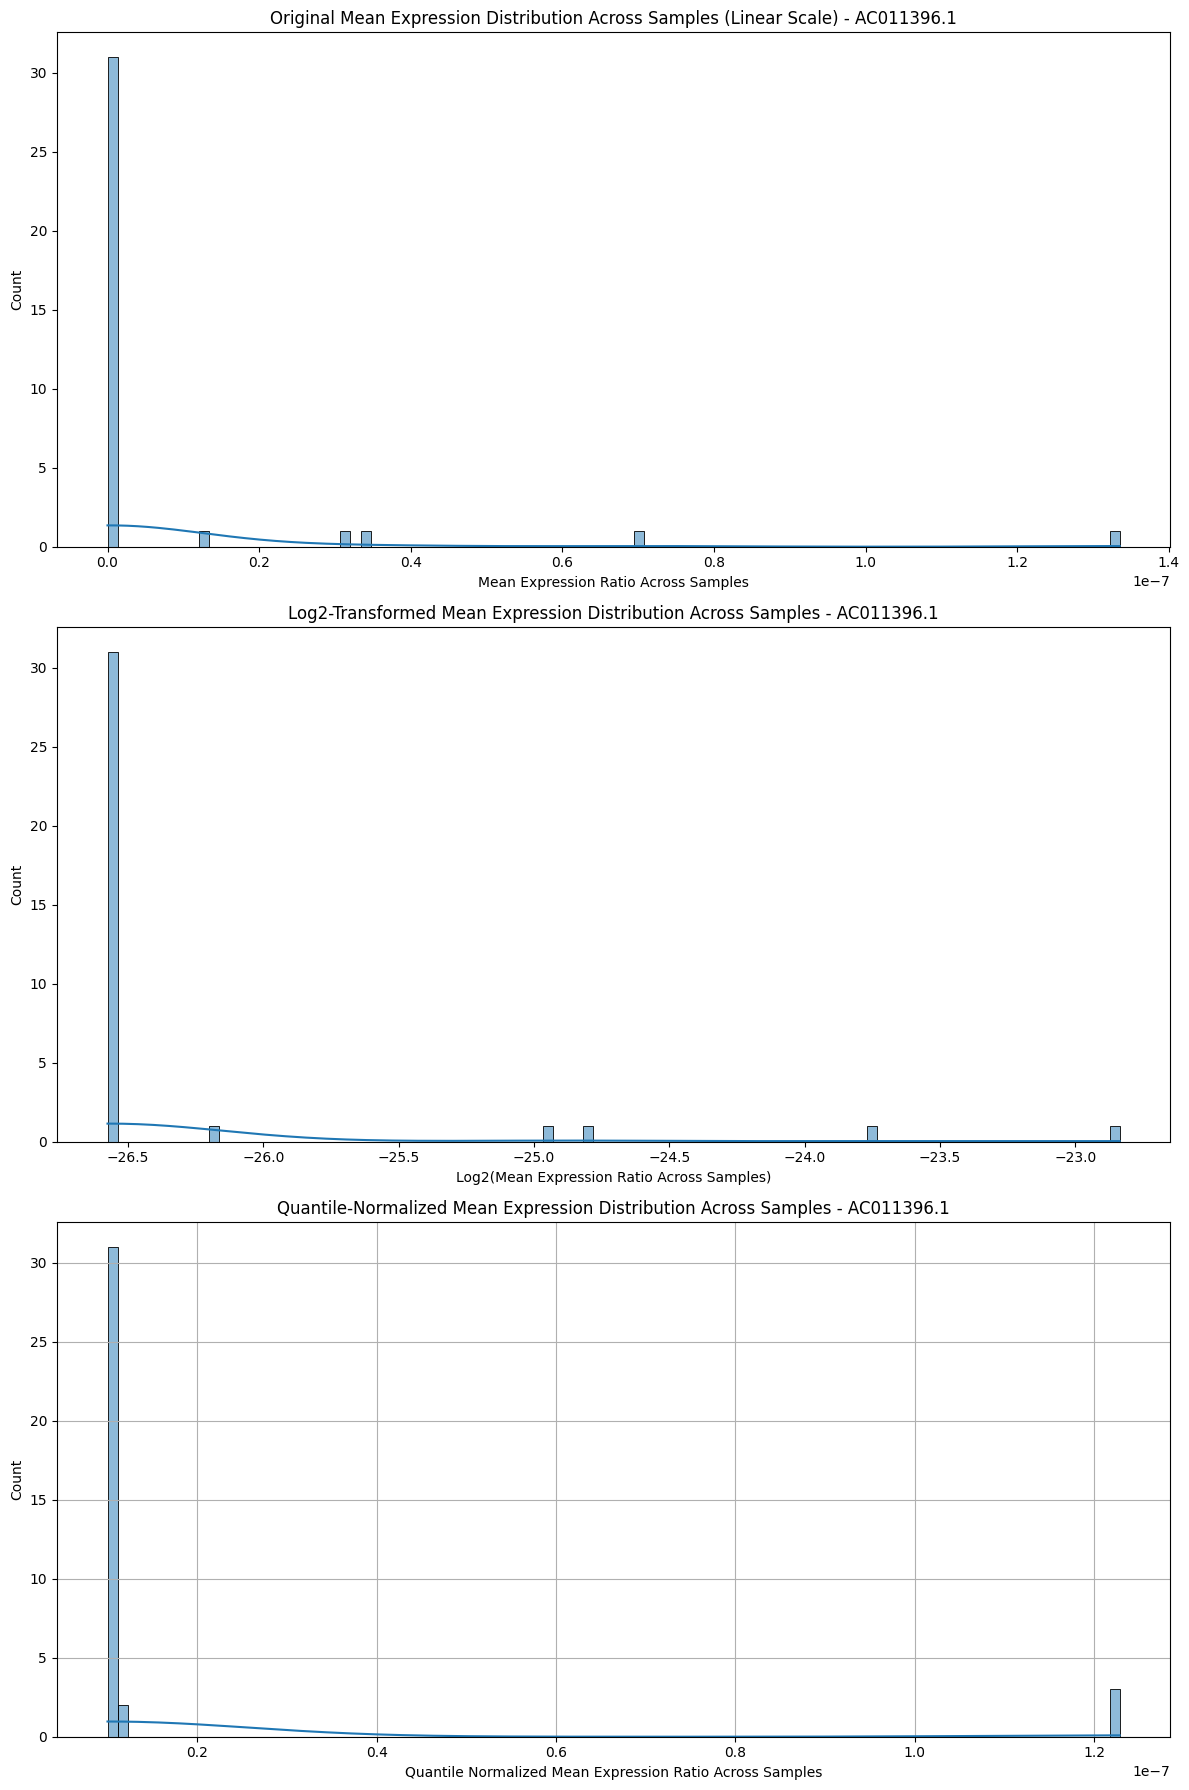

Original data summary:
count    3.600000e+01
mean     7.836047e-09
std      2.556037e-08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.335251e-07
Name: AC011396.1, dtype: float64

Log2-transformed data summary:
count    36.000000
mean    -26.288080
std       0.843146
min     -26.575425
25%     -26.575425
50%     -26.575425
75%     -26.575425
max     -22.836386
Name: AC011396.1, dtype: float64

Quantile-normalized data summary:
count    3.600000e+01
mean     1.952314e-08
std      3.159874e-08
min      1.000000e-08
25%      1.000000e-08
50%      1.000000e-08
75%      1.000000e-08
max      1.228457e-07
Name: AC011396.1, dtype: float64


In [75]:
# Loop through each gene in the normalized data to analyze and plot across samples
for gene in mean_df_normalized.index[:10]: 
    print(f"\n\nAnalyzing gene: {gene}")
    
    # Extract the normalized and original mean expression data for the current gene across all samples
    gene_data = mean_df.loc[gene]
    gene_normalized_data = mean_df_normalized.loc[gene]
    
    # Plot transformations and summary statistics
    plot_gene_distribution_across_samples(gene_data, gene_normalized_data, gene)